In [37]:
import pandas as pd

Convertimos la columna fecha original a datetime. 

In [73]:
df['Fecha_org']=pd.to_datetime(df['Fecha_org'])

En este momento ya tenemos nuestro dataframe listo para trabajar con el índice como la fecha y dos variables int64. 

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

# ANÁLISIS EXPLORATORIO

Para iniciar, se verifica sobre el rango de las variables. El arreglo id_operaciones contiene los 

In [52]:
id_operaciones=df['Operacion'].unique()
print('El numero total de tipos de operaciones es', len(id_operaciones))
id_operaciones

El numero total de tipos de operaciones es 46


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [43]:
conda install -c damianavila82 rise

Solving environment: done

## Package Plan ##

  environment location: /Users/pro/opt/anaconda3

  added / updated specs:
    - rise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.1                |   py38hecd8cb5_0         2.9 MB
    rise-5.6.1                 |           py38_1         1.6 MB
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following NEW packages will be INSTALLED:

  rise               pkgs/main/osx-64::rise-5.6.1-py38_1

The following packages will be UPDATED:

  conda              conda-forge::conda-4.9.0-py38h5347e94~ --> pkgs/main::conda-4.9.1-py38hecd8cb5_0



rise-5.6.1           | 1.6 MB    | ##################################### | 100% 
conda-4.9.1          | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transacti

In [54]:
id_terminales=df['id Terminal'].unique()
print('El número total de tipos de terminales es', len(id_terminales))
id_terminales

El número total de tipos de terminales es 47


array([1828, 1593, 1746, 1759, 1882, 1919, 1574, 1973, 1994, 1986, 1996,
       1944, 1816, 1597, 1582, 1875, 1577, 1964, 1896, 1507, 1908, 1997,
       1772, 1741, 1827, 1928, 1993, 1594, 1981, 1575, 1537, 1991, 1805,
       1980, 1987, 1963, 1971, 1910, 1824, 1774, 1995, 1946, 1864, 1922,
       1929, 1953, 1515])

Ahora,verificamos los tipos de operacion con mayor volumen de transacción para todas las terminales.


In [144]:
o=df.groupby(['Operacion']).size()
o=o.sort_values(ascending=False)
o

Operacion
0     423929
3     127399
1      79195
7      50662
4      35817
5      16124
2       7526
10      6988
6       6066
9       4600
14      3674
12      3535
8       3292
13      1710
21      1016
19       733
26       729
16       391
23       341
15       333
18       300
25       242
11       210
28       129
20       103
24        88
31        77
22        29
36        28
34        28
29        23
17        23
32        18
39        18
38        17
35        16
41        16
27        12
40         6
42         6
37         5
30         4
44         3
43         3
33         1
45         1
dtype: int64

In [61]:
top5_operaciones=[0,3,1,7,4]

In [62]:

df_max_opera= df[(df['Operacion']==0) | (df['Operacion']==3) | (df['Operacion']==1)| (df['Operacion']==7)| (df['Operacion']==4)]

In [70]:

Top_terminales=df_max_opera.groupby(['id Terminal']).size().sort_values(ascending=False)

In [71]:
Top_terminales

id Terminal
1774    30361
1908    29056
1964    28387
1910    25213
1980    22157
1741    21849
1593    20979
1824    20874
1896    20022
1864    19895
1946    19843
1944    19307
1746    19176
1575    19021
1805    18958
1828    18278
1577    18047
1987    17328
1827    16620
1971    16615
1996    16450
1919    15534
1772    15479
1963    15341
1922    15155
1981    15065
1929    14735
1928    13884
1994    13620
1882    12038
1991    11936
1582    10499
1537    10351
1759     9947
1875     9923
1574     9876
1973     9873
1594     9235
1816     9215
1995     8995
1953     8670
1597     8474
1997     7837
1993     7702
1986     7258
1507     3986
1515     3938
dtype: int64

In [223]:
Terminales_todas_op=df.groupby(['id Terminal']).size()
Terminales_todas_op=df.sort_values(ascending=False)
Terminales_todas_op

TypeError: sort_values() missing 1 required positional argument: 'by'

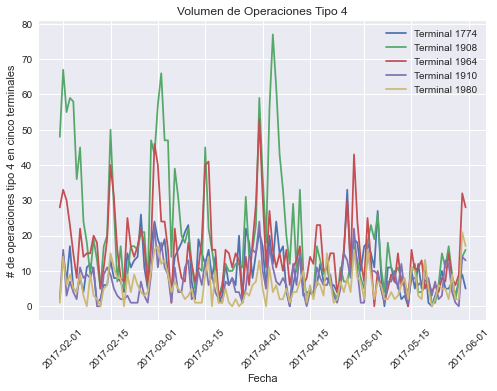

In [87]:
dias_1774_4=df[['Fecha_org','Operacion']].loc[(df['id Terminal']==1774)].loc[df['Operacion']==4].resample('D', on='Fecha_org').count()
dias_1908_4=df[['Fecha_org','Operacion']].loc[(df['id Terminal']==1908)].loc[df['Operacion']==4].resample('D', on='Fecha_org').count()
dias_1964_4=df[['Fecha_org','Operacion']].loc[(df['id Terminal']==1964)].loc[df['Operacion']==4].resample('D', on='Fecha_org').count()
dias_1910_4=df[['Fecha_org','Operacion']].loc[(df['id Terminal']==1910)].loc[df['Operacion']==4].resample('D', on='Fecha_org').count()
dias_1980_4=df[['Fecha_org','Operacion']].loc[(df['id Terminal']==1980)].loc[df['Operacion']==4].resample('D', on='Fecha_org').count()

plt.plot(dias_1774_4['Operacion'],label="Terminal 1774")
plt.plot(dias_1908_4['Operacion'],label="Terminal 1908")
plt.plot(dias_1964_4['Operacion'],label="Terminal 1964")
plt.plot(dias_1910_4['Operacion'],label="Terminal 1910")
plt.plot(dias_1980_4['Operacion'],label="Terminal 1980")

plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('# de operaciones tipo 4 en cinco terminales')
plt.title("Volumen de Operaciones Tipo 4")
plt.xticks(rotation=45)
plt.show(block=False)    

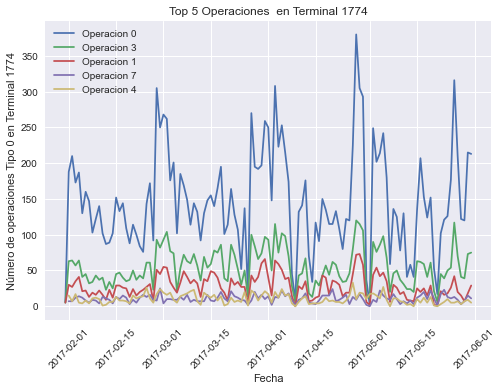

In [102]:

plt.plot(dias_1774_0['Operacion'],label="Operacion 0")
plt.plot(dias_1774_3['Operacion'],label="Operacion 3")
plt.plot(dias_1774_1['Operacion'],label="Operacion 1")
plt.plot(dias_1774_7['Operacion'],label="Operacion 7")
plt.plot(dias_1774_4['Operacion'],label="Operacion 4")
plt.legend(loc='best')
plt.ylabel('Número de operaciones Tipo 0 en Terminal 1774') 
plt.xlabel("Fecha")
plt.title("Top 5 Operaciones  en Terminal 1774")
plt.xticks(rotation=45)
plt.show(block=False)



# MODELO PREDICTIVO 

In [176]:
import plotly.express as px
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

ModuleNotFoundError: No module named 'plotly'

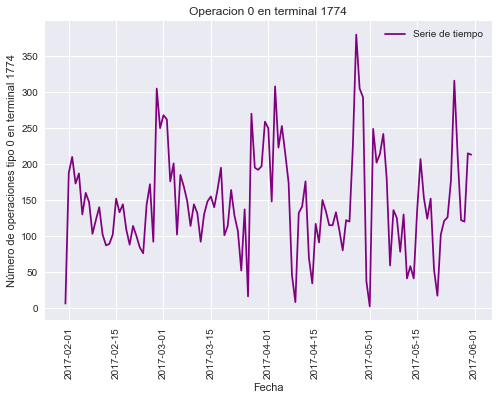

In [129]:
plt.xlabel('Fecha')

plt.plot(dias_1774_0['Operacion'],label="Serie de tiempo",color="purple")
plt.ylabel('Número de operaciones tipo 0 en terminal 1774')
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.title("Operacion 0 en terminal 1774")
plt.xticks(rotation=90)
plt.show(block=False)


La primera pregunta a responder es si la serie de tiempo es estacionaria?
Procedemos a realizar 2 diferentes tests para la verificación:


## 1er Test= Rolling statistics

In [134]:
rollmean= dias_1774_0['Operacion'].rolling(window=10).mean()

rollstd= dias_1774_0['Operacion'].rolling(window=10).std()



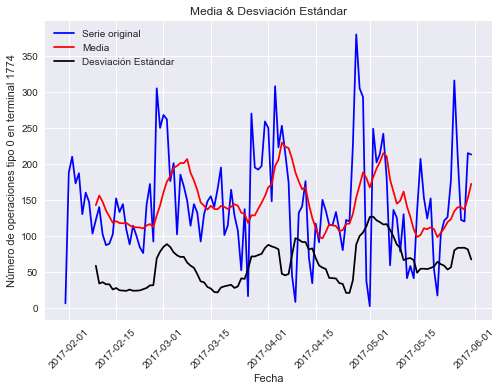

In [135]:
plt.plot(dias_1774_0['Operacion'],color="blue", label="Serie original")
plt.plot(rollmean,color="red", label="Media")
plt.plot(rollstd,color="black", label="Desviación Estándar")
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Número de operaciones tipo 0 en terminal 1774')
plt.title("Media & Desviación Estándar")
plt.xticks(rotation=45)
plt.show(block=False)



La serie de tiempo no tiene una media ni una varianza constante. Por ende, se presume no es estacionaria.


## 2 Test: Dickey Fuller Aumentado 


In [110]:
from statsmodels.tsa.stattools import adfuller


In [136]:
print('Resultados de Test de Dickey Fuller')

dftest=adfuller(dias_1774_0['Operacion'],autolag='AIC')

dfoutput= pd.Series (dftest[0:4],index=["Test Estadístico", "P-valor", "Rezagos Usados","Numero de observaciones usadas"])
for key,value in dftest[4].items():
    
    dfoutput['Valor Crítico (%s)'%key]=value
    
print(dfoutput)

Resultados de Test de Dickey Fuller
Test Estadístico                 -6.810256e+00
P-valor                           2.125214e-09
Rezagos Usados                    0.000000e+00
Numero de observaciones usadas    1.200000e+02
Valor Crítico (1%)               -3.486056e+00
Valor Crítico (5%)               -2.885943e+00
Valor Crítico (10%)              -2.579785e+00
dtype: float64


El p valor si bien tiende a cero no nos permite rechazar la hipotesis nula de que el proceso tiene raiz unitaria. Es decir que es una caminata aleatoria. Por ende, la serie de tiempo se presume no es estacionaria. Y proseguimos a intentar diversas transformaciones para mostrar su estacionariedad. 

In [113]:
import numpy as np

## Transformaciones 

Definimos una función para realizar de manera ágil los 2 tests para cada transformación que se realice a la serie de tiempo.

In [196]:
from statsmodels.tsa.stattools import adfuller
def test_estacionariedad(serie_operaciones):
     
    ###Determinar estadísticas moviles   
    promedio_movil= serie_operaciones.rolling(window=10).mean()
    desviacion_estandar= serie_operaciones.rolling(window=10).std()

    ##Graficar estadisticas moviles 
    orig=plt.plot(serie_operaciones,color="blue", label="Serie original")
    mean=plt.plot(promedio_movil,color="red", label="Media")
    std=plt.plot(desviacion_estandar,color="black", label="Desviación Estándar")
    plt.legend(loc='best')
    plt.title("Media & Desviación Estándar")
    plt.xticks(rotation=90)
    plt.show(block=False)
       
    ## Determinar el test de Dickey Fuller
    print('Resultados de Test de Dickey Fuller')

    dftest=adfuller(serie_operaciones,autolag='AIC')

    dfoutput= pd.Series (dftest[0:4],index=["Test Estadístico", "P-valor", "Rezagos Usados","Numero de observaciones usadas"])
    for key,value in dftest[4].items():
    
        dfoutput['Valor Crítico (%s)'%key]=value
    
    print(dfoutput)
        

### Logaritmo natural 

In [197]:
dias_1774_0_log_scale=np.log(dias_1774_0['Operacion'])

No handles with labels found to put in legend.


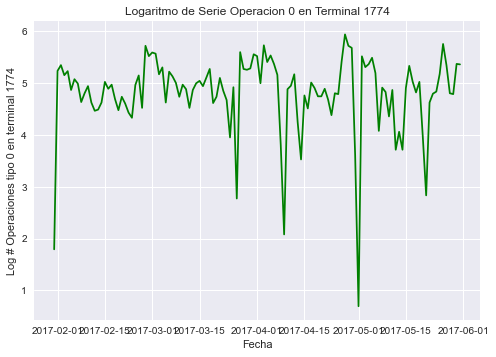

In [198]:
plt.plot(dias_1774_0_log_scale,color="green")
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Log # Operaciones tipo 0 en terminal 1774')
plt.title("Logaritmo de Serie Operacion 0 en Terminal 1774")
plt.show(block=False)

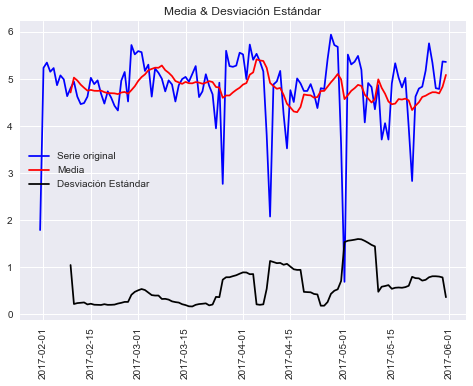

Resultados de Test de Dickey Fuller
Test Estadístico                 -9.300484e+00
P-valor                           1.115968e-15
Rezagos Usados                    0.000000e+00
Numero de observaciones usadas    1.200000e+02
Valor Crítico (1%)               -3.486056e+00
Valor Crítico (5%)               -2.885943e+00
Valor Crítico (10%)              -2.579785e+00
dtype: float64


In [199]:

test_estacionariedad(dias_1774_0_log_scale)


### Promedio Movil 10 Dias Window 

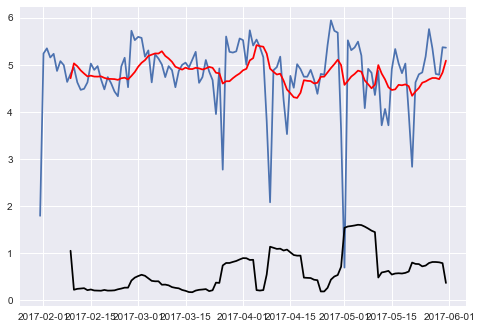

In [147]:
promedio_movil= dias_1774_0_log_scale.rolling(window=10).mean()
desviacion_estandar= dias_1774_0_log_scale.rolling(window=10).std()

plt.plot(dias_1774_0_log_scale)
plt.plot(promedio_movil,color="red")
plt.plot(desviacion_estandar,color="black")

In [151]:
promedio_movil.head(12)
promedio_movil.dropna(inplace=True)
promedio_movil.head(12)

Fecha_org
2017-02-09    4.713160
2017-02-10    5.028148
2017-02-11    4.967001
2017-02-12    4.878881
2017-02-13    4.812416
2017-02-14    4.751802
2017-02-15    4.767437
2017-02-16    4.748954
2017-02-17    4.746893
2017-02-18    4.752554
2017-02-19    4.719886
2017-02-20    4.699342
Freq: D, Name: Operacion, dtype: float64

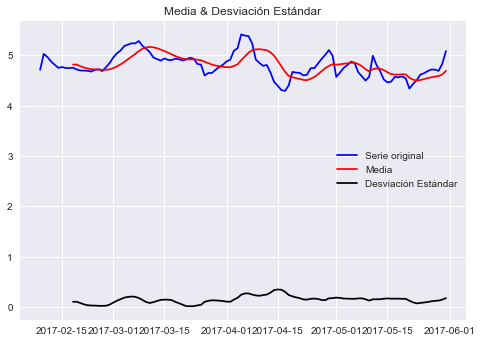

Resultados de Test de Dickey Fuller
Test Estadístico                   -2.068920
P-valor                             0.257194
Rezagos Usados                     10.000000
Numero de observaciones usadas    101.000000
Valor Crítico (1%)                 -3.496818
Valor Crítico (5%)                 -2.890611
Valor Crítico (10%)                -2.582277
dtype: float64


In [152]:
test_estacionariedad(promedio_movil)

### Logaritmo menos Promedio Movil 

In [153]:
dias_log_scale_menos_promedio_movil=dias_1774_0_log_scale - promedio_movil

In [154]:
dias_log_scale_menos_promedio_movil.head(12)
dias_log_scale_menos_promedio_movil.dropna(inplace=True)
dias_log_scale_menos_promedio_movil.head(12)



Fecha_org
2017-02-09    0.090861
2017-02-10   -0.086506
2017-02-11   -0.342029
2017-02-12   -0.412973
2017-02-13   -0.323780
2017-02-14   -0.126830
2017-02-15    0.256444
2017-02-16    0.141395
2017-02-17    0.222921
2017-02-18   -0.061207
2017-02-19   -0.242549
2017-02-20    0.036857
Freq: D, Name: Operacion, dtype: float64

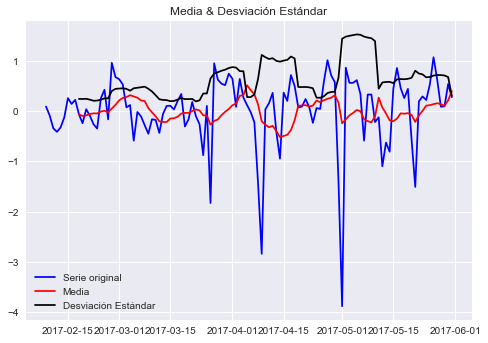

Resultados de Test de Dickey Fuller
Test Estadístico                 -7.788692e+00
P-valor                           8.049956e-12
Rezagos Usados                    0.000000e+00
Numero de observaciones usadas    1.110000e+02
Valor Crítico (1%)               -3.490683e+00
Valor Crítico (5%)               -2.887952e+00
Valor Crítico (10%)              -2.580857e+00
dtype: float64


In [155]:
test_estacionariedad(dias_log_scale_menos_promedio_movil)

### Atenuacion Simple 

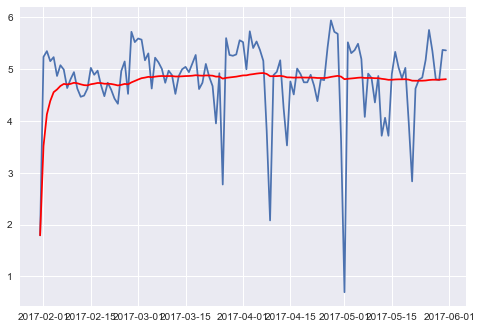

In [156]:
atenuacion_simple_decay_avg=dias_1774_0_log_scale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(dias_1774_0_log_scale)
plt.plot(atenuacion_simple_decay_avg, color="red")

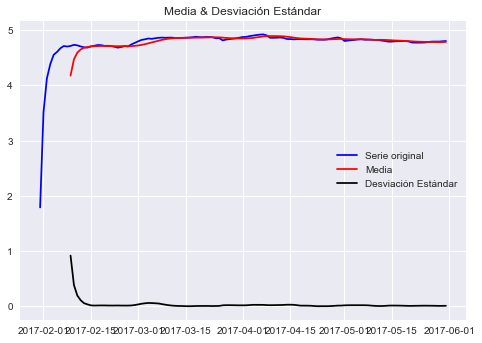

Resultados de Test de Dickey Fuller
Test Estadístico                   -4.689379
P-valor                             0.000088
Rezagos Usados                      1.000000
Numero de observaciones usadas    119.000000
Valor Crítico (1%)                 -3.486535
Valor Crítico (5%)                 -2.886151
Valor Crítico (10%)                -2.579896
dtype: float64


In [158]:
test_estacionariedad(atenuacion_simple_decay_avg)

### Logaritmo menos Atenuacion Simple

In [160]:
dias_log_scale_menos_atenuacion_simple= dias_1774_0_log_scale - atenuacion_simple_decay_avg

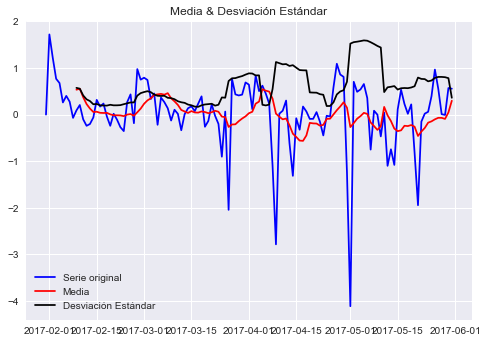

Resultados de Test de Dickey Fuller
Test Estadístico                 -7.883246e+00
P-valor                           4.642058e-12
Rezagos Usados                    0.000000e+00
Numero de observaciones usadas    1.200000e+02
Valor Crítico (1%)               -3.486056e+00
Valor Crítico (5%)               -2.885943e+00
Valor Crítico (10%)              -2.579785e+00
dtype: float64


In [161]:
test_estacionariedad(dias_log_scale_menos_atenuacion_simple) 




### Atenuacion simple - Atenuacion simple rezago orden 1

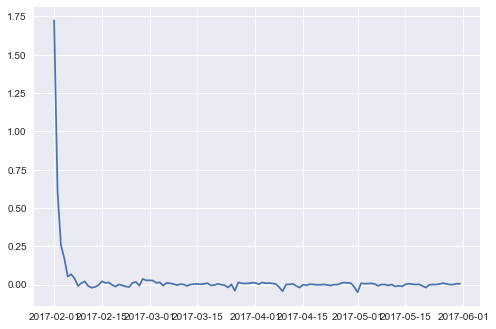

In [162]:
dias_ate=atenuacion_simple_decay_avg -atenuacion_simple_decay_avg.shift()
plt.plot(dias_ate)

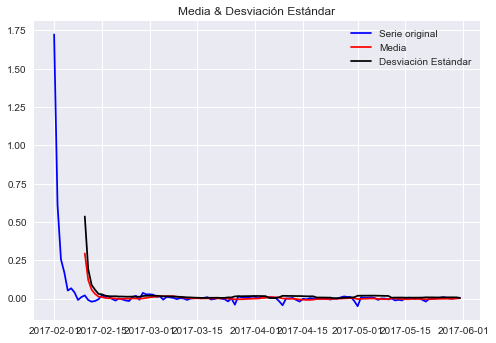

Resultados de Test de Dickey Fuller
Test Estadístico                  -77.832453
P-valor                             0.000000
Rezagos Usados                      0.000000
Numero de observaciones usadas    119.000000
Valor Crítico (1%)                 -3.486535
Valor Crítico (5%)                 -2.886151
Valor Crítico (10%)                -2.579896
dtype: float64


In [163]:
dias_ate.dropna(inplace=True)
test_estacionariedad(dias_ate)

###  Diferencias de Logaritmo 

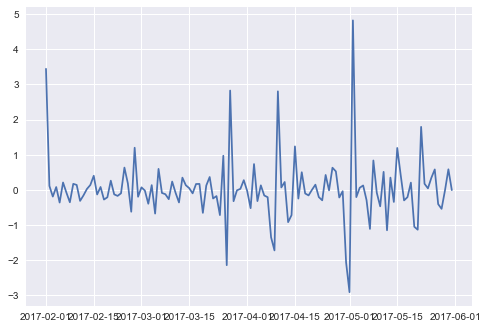

In [164]:
dias_log_desplazado=dias_1774_0_log_scale - dias_1774_0_log_scale.shift()
plt.plot(dias_log_desplazado)


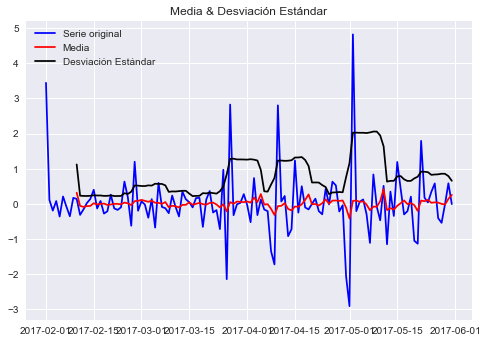

Resultados de Test de Dickey Fuller
Test Estadístico                 -8.127975e+00
P-valor                           1.109857e-12
Rezagos Usados                    5.000000e+00
Numero de observaciones usadas    1.140000e+02
Valor Crítico (1%)               -3.489058e+00
Valor Crítico (5%)               -2.887246e+00
Valor Crítico (10%)              -2.580481e+00
dtype: float64


In [166]:
dias_log_desplazado.dropna(inplace=True)
test_estacionariedad(dias_log_desplazado)

### Descomposición de la tendencia y residuos

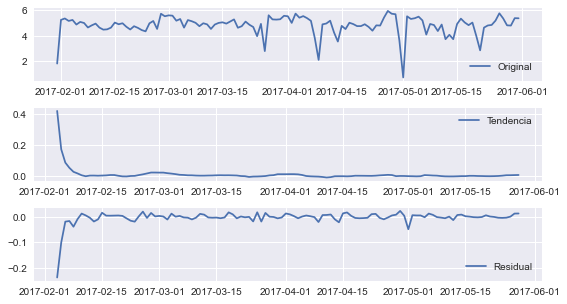

In [204]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(dias_ate)
#
tendencia=decomposition.trend
estacionariedad=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(dias_1774_0_log_scale,label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(tendencia,label="Tendencia")
plt.legend(loc="best")

#plt.subplot(413)
#plt.subplot(estacionariedad,label="Estacionariedad")
#plt.legend(loc="best")

plt.subplot(413)
plt.plot(residual,label="Residual")
plt.legend(loc="best")

plt.tight_layout()






In [171]:
#Verificar si ruido es estacionario

descomposicion=residual
descomposicion=descomposicion.dropna(inplace=True)
test_estacionariedad(descomposicion)




AttributeError: 'NoneType' object has no attribute 'rolling'

El modelo propuesto para desarrollar el ejercicio es ARIMA. ARIMA es la combinación de dos modelos: 1) un AutoRegresivo AR y 2) Un Promedio Móvil: Moving Average
        
El modelo tiene 3 parámetros: 
P: que son los rezagos autoregresivos,
Q: promedio móvil simple
D: orden de diferenciación

P: PACF Plot Grafico de Autocorrelacion Parcial 

Q: ACF PLOT Grafico de Autocorrelacion

    

Text(0.5, 1.0, 'Autocorrelation Function')

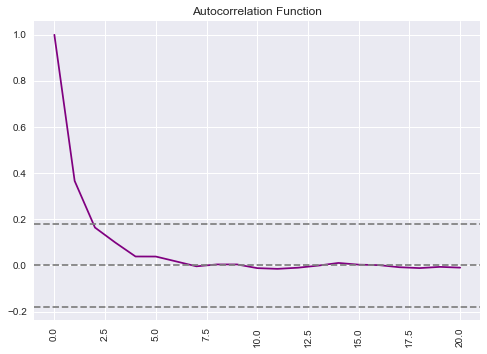

In [201]:
##Graficar ACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dias_ate,nlags=20)

lag_pacf=pacf(dias_ate,nlags=20,method="ols")

## Grafico ACF


rerr=plt.plot(lag_acf,color="purple")
plt.axhline(y=0,linestyle= "--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(atenuacion_simple_decay_avg)), linestyle= "--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(atenuacion_simple_decay_avg)), linestyle= "--", color="gray")
plt.xticks(rotation=90)
plt.title("Autocorrelation Function")
            



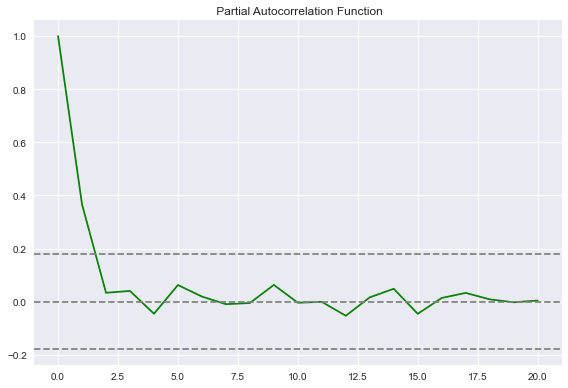

In [180]:
## Grafico PACF

re=plt.plot(lag_pacf,color="green")
plt.axhline(y=0,linestyle= "--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(atenuacion_simple_decay_avg)), linestyle= "--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(atenuacion_simple_decay_avg)), linestyle= "--", color="gray")

plt.title(" Partial Autocorrelation Function")
plt.tight_layout()



/Users/pro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Plotting AR model


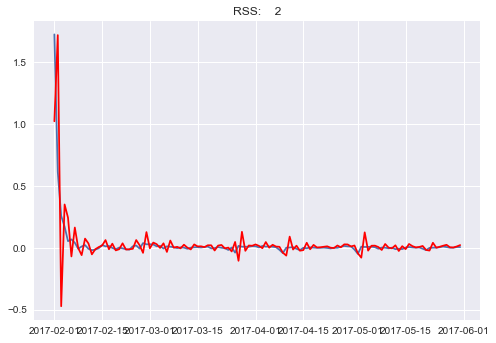

In [218]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

model= ARIMA(atenuacion_simple_decay_avg,order=(3,1,0))
results_AR=model.fit(disp=-1)
plt.plot(dias_ate)
plt.plot(results_AR.fittedvalues, color="red")
plt.title("RSS: %4.f"% sum((results_AR.fittedvalues-dias_ate)**2))
print("Plotting AR model")



Plotting MA model


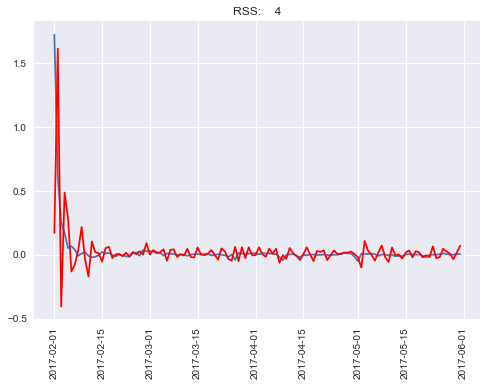

In [215]:
from statsmodels.tsa.arima_model import ARIMA

#MA MODEL
#atenuacion_simple_decay_avg
model= ARIMA(atenuacion_simple_decay_avg,order=(0,1,7))
results_AR=model.fit(disp=-1)
plt.plot(dias_ate)
plt.plot(results_AR.fittedvalues, color="red")
plt.title("RSS: %4.f"% sum((results_AR.fittedvalues-dias_ate)**2))
plt.xticks(rotation=90)
print("Plotting MA model")



Plotting ARIMA model


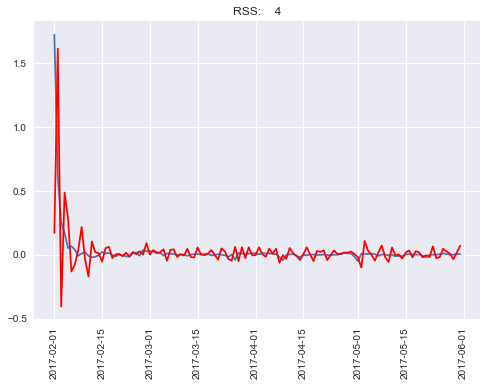

In [217]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA MODEL

model= ARIMA(atenuacion_simple_decay_avg,order=(0,1,7))
results_AR=model.fit(disp=-1)
plt.plot(dias_ate)
plt.plot(results_AR.fittedvalues, color="red")
plt.title("RSS: %4.f"% sum((results_AR.fittedvalues-dias_ate)**2))
plt.xticks(rotation=90)
print("Plotting ARIMA model")


